In [151]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [88]:
#This dataset has 69 columns, so make sure all of the cols are displayed
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [89]:
#Open the csv file
df=pd.read_csv('https://raw.githubusercontent.com/shonjeeyeon/DG_Week_8/main/Healthcare_dataset.csv')

# **`Overview of the file`**

In [90]:
#Preview of the file

print(df.head(10))
print(df.tail(10))

  Ptid Persistency_Flag  Gender           Race     Ethnicity   Region Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket Gluco_Record_Prior_Ntm Gluco_Record_During_Rx  Dexa_Freq_During_Rx Dexa_During_Rx Frag_Frac_Prior_Ntm Frag_Frac_During_Rx Risk_Segment_Prior_Ntm Tscore_Bucket_Prior_Ntm Risk_Segment_During_Rx Tscore_Bucket_During_Rx Change_T_Score Change_Risk_Segment Adherent_Flag Idn_Indicator Injectable_Experience_During_Rx Comorb_Encounter_For_Screening_For_Malignant_Neoplasms Comorb_Encounter_For_Immunization Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx Comorb_Vitamin_D_Deficiency Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx Comorb_Long_Term_Current_Drug_Therapy Comorb_Dorsalgia Comorb_Personal_History_Of_Other_Diseases_And_Conditions Comorb_Other_Disorders_Of_Bone_Density_And_Structure Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias  \
0   P1

In [91]:
#Number of cols and rows

print(df.shape)

(3424, 69)


In [92]:
#Check for null values

print(df.isna().sum())

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64


In [93]:
#Check for duplicates

print(df.duplicated().sum())

0


In [94]:
#Data type of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [95]:
#Find unique values in columns

for col in df:
  print(col,df[col].unique())

Ptid ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag ['Persistent' 'Non-Persistent']
Gender ['Male' 'Female']
Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown']
Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket ['>75' '55-65' '65-75' '<55']
Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & O

In [96]:
#Skews and stats of quant data
print(df.skew())
print(df.kurtosis())
print(df.describe())

Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64
Dexa_Freq_During_Rx    74.758378
Count_Of_Risks          0.900486
dtype: float64
       Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
#Percentage of the each unique value
col=df.columns

for i in col:
  print(df[i].value_counts(normalize=True)*100)

P1       0.029206
P2275    0.029206
P2277    0.029206
P2278    0.029206
P2279    0.029206
           ...   
P1145    0.029206
P1146    0.029206
P1147    0.029206
P1148    0.029206
P3424    0.029206
Name: Ptid, Length: 3424, dtype: float64
Non-Persistent    62.353972
Persistent        37.646028
Name: Persistency_Flag, dtype: float64
Female    94.334112
Male       5.665888
Name: Gender, dtype: float64
Caucasian           91.939252
Other/Unknown        2.832944
African American     2.774533
Asian                2.453271
Name: Race, dtype: float64
Not Hispanic    94.48014
Hispanic         2.86215
Unknown          2.65771
Name: Ethnicity, dtype: float64
Midwest          40.391355
South            36.419393
West             14.661215
Northeast         6.775701
Other/Unknown     1.752336
Name: Region, dtype: float64
>75      42.026869
65-75    31.717290
55-65    21.407710
<55       4.848131
Name: Age_Bucket, dtype: float64
GENERAL PRACTITIONER                                              44.8

# **Data Cleansing and Preprocessing**

In [98]:
#Function for cleaning the column names

def Clean(df):
  df.columns=df.columns.str.lower()
  df.columns = df.columns.str.replace(' ', '')
  df.columns=df.columns.str.replace('[^\w]','_',regex=True)
  return df

In [99]:
#Clean the col names
Clean(df)

#Drop ptid (index number col)
df=df.drop('ptid',axis=1)

In [100]:
#Replace Unknowns with NaNs
df=df.replace(['Unknown','Other/Unknown'],np.nan)

#However, We will use 'unknown' in prescriber speciality - use fillna to undo the change in the column
df['ntm_speciality']=df['ntm_speciality'].fillna('UNKNOWN')

In [101]:
#Delete columns with NaN > 40%
threshold=0.4
df=df.loc[:, df.isnull().mean()<threshold]

#Impute other values using mode
for i in df.columns:
  df[i] = df[i].fillna(df[i].mode()[0])

In [102]:
#Speciality: Correct the typo in the value

df=df.replace('OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY', 'OBSTETRICS AND GYNECOLOGY')

In [103]:
#Speciality: Use 'OTHER' for values <1.00%
series = pd.value_counts(df['ntm_speciality'])
mask = (series/series.sum() * 100).lt(1)

df['ntm_speciality'] = np.where(df['ntm_speciality'].isin(series[mask].index),'OTHER',df['ntm_speciality'])

In [104]:
#Encode the categorical values

df=df.replace(['N','Y'],[0,1])
df=df.replace(['Non-Persistent','Persistent'],[0,1])
df=df.replace(['Male','Female'],[0,1])
df=df.replace(['Non-Hispanic','Hispanic'],[0,1])

df=pd.get_dummies(df)
Clean(df)

,persistency_flag,gender,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,comorb_encntr_for_general_exam_w_o_complaint__susp_or_reprtd_dx,comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,race_africanamerican,race_asian,race_caucasian,ethnicity_1,ethnicity_nothispanic,region_midwest,region_northeast,region_south,region_west,age_bucket_55_65,age_bucket_65_75,age_bucket__55,age_bucket__75,ntm_speciality_endocrinology,ntm_speciality_generalpractitioner,ntm_speciality_obstetricsandgynecology,ntm_speciality_oncology,ntm_speciality_other,ntm_speciality_rheumatology,ntm_speciality_unknown,ntm_specialist_flag_others,ntm_specialist_flag_specialist,ntm_speciality_bucket_endo_onc_uro,ntm_speciality_bucket_ob_gyn_others_pcp_unknown,ntm_speciality_bucket_rheum,risk_segment_prior_ntm_hr_vhr,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm____2_5,tscore_bucket_prior_ntm___2_5,adherent_flag_adherent,adherent_flag_non_adherent
0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
4,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
3420,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [105]:
#Find number of comorbidities, concomitant treatments, and risks per patient


comorbidities=[ 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint__susp_or_reprtd_dx',
 'comorb_vitamin_d_deficiency',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'comorb_long_term_current_drug_therapy',
 'comorb_dorsalgia',
 'comorb_personal_history_of_other_diseases_and_conditions',
 'comorb_other_disorders_of_bone_density_and_structure',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'comorb_personal_history_of_malignant_neoplasm',
 'comorb_gastro_esophageal_reflux_disease']

concomitant=['concom_cholesterol_and_triglyceride_regulating_preparations',
 'concom_narcotics',
 'concom_systemic_corticosteroids_plain',
 'concom_anti_depressants_and_mood_stabilisers',
 'concom_fluoroquinolones',
 'concom_cephalosporins',
 'concom_macrolides_and_similar_types',
 'concom_broad_spectrum_penicillins',
 'concom_anaesthetics_general',
 'concom_viral_vaccines']

risks=['risk_type_1_insulin_dependent_diabetes',
 'risk_osteogenesis_imperfecta',
 'risk_rheumatoid_arthritis',
 'risk_untreated_chronic_hyperthyroidism',
 'risk_untreated_chronic_hypogonadism',
 'risk_untreated_early_menopause',
 'risk_patient_parent_fractured_their_hip',
 'risk_smoking_tobacco',
 'risk_chronic_malnutrition_or_malabsorption',
 'risk_chronic_liver_disease',
 'risk_family_history_of_osteoporosis',
 'risk_low_calcium_intake',
 'risk_vitamin_d_insufficiency',
 'risk_poor_health_frailty',
 'risk_excessive_thinness',
 'risk_hysterectomy_oophorectomy',
 'risk_estrogen_deficiency',
 'risk_immobilization',
 'risk_recurring_falls']

df['comorb'] = df[comorbidities].sum(axis=1)
df['concom']= df[concomitant].sum(axis=1)
df['risk']=df[risks].sum(axis=1)

In [106]:
#Drop duplicate columns

#'count_of_risks' and 'risk' carry same info, and 'risk' has wider range
df=df.drop('count_of_risks',axis=1)

#'dexa_during_rx' and 'dexa_freq_during_rx' carry same info, and 'dexa_freq_during_rx' carries more detailed info
df=df.drop('dexa_during_rx',axis=1)

In [107]:
## Address outliers in quant varianbles 
nums=['dexa_freq_during_rx','comorb','risk','concom']

for i in nums:
  quantiles = df[i].quantile([0.05,0.95]).values
  print(i,quantiles)
  df[i][df[i] <= quantiles[0]] = quantiles[0]
  df[i][df[i] >= quantiles[1]] = quantiles[1]

print(df.skew())

dexa_freq_during_rx [ 0. 14.]
comorb [0. 9.]
risk [0. 3.]
concom [0. 6.]
persistency_flag              0.510194
gender                       -3.836984
gluco_record_prior_ntm        1.249862
gluco_record_during_rx        1.074557
dexa_freq_during_rx           1.735419
                                ...   
adherent_flag_adherent       -4.106080
adherent_flag_non_adherent    4.106080
comorb                        0.292878
concom                        0.699964
risk                          0.382245
Length: 86, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
#Reduce skews if skew > 0.5 or skew < -0.5

unskew1=np.sqrt(df['dexa_freq_during_rx'])
print(unskew1.skew())

unskew2=np.sqrt(df['concom'])
print(unskew2.skew())

1.2804098579205285
-0.2120319774091088


# **Choose Important Features and Make Test/Training Sets**

In [109]:
#Split X and y for RFE

y=df[['persistency_flag']]
X=df.drop('persistency_flag',axis=1)

#Split Train/Test sets for RFE, then SMOTE to balance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022, stratify=y)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm=np.ravel(y_train_sm)

In [110]:
#Redundant Feature Elimination (RFE) to choose 7 most important features

#rfe = RFE(RandomForestClassifier(), n_features_to_select=7)
#_ = rfe.fit(X_train_sm,y_train_sm)
#print('Top 7 Features\n',X.columns[rfe.support_])

['dexa_freq_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_long_term_current_drug_therapy', 'comorb', 'concom', 'risk'] are the most important features per RFE: will use these for model/app development.

In [111]:
#Set a new X using the 7 features above

big7=['dexa_freq_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization',  'comorb_long_term_current_drug_therapy', 'comorb', 'concom', 'risk']

X=df[big7]
print(X.head())

   dexa_freq_during_rx  comorb_encounter_for_screening_for_malignant_neoplasms  comorb_encounter_for_immunization  comorb_long_term_current_drug_therapy  comorb  concom  risk
0                    0                                                  0                                       1                                      0       5       0     0
1                    0                                                  0                                       0                                      0       1       0     0
2                    0                                                  1                                       0                                      0       2       1     2
3                    0                                                  0                                       1                                      0       6       3     1
4                    0                                                  1                                       1            

In [147]:
#Set new training/test sets, then SMOTE to balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022, stratify=y)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm=np.ravel(y_train_sm)
y_test=np.ravel(y_test)

# **Linear Model: Logistic Regression**

In [148]:
# Logistic Regression Classifier
lr = LogisticRegression(random_state=42, max_iter=2000, solver='saga', class_weight='balanced',C=0.1,penalty='l2')    

lr.fit(X_train_sm, y_train_sm)            
y_pred = lr.predict(X_test) 

print('AUC     : ', roc_auc_score(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall  : ', recall_score(y_test, y_pred))    
print(confusion_matrix(y_true=y_test,y_pred=y_pred))                        

AUC     :  0.8049352129713634
Accuracy:  0.8189252336448598
Recall  :  0.7484472049689441
[[460  74]
 [ 81 241]]


# **Ensemble Model: Random Forest**

In [114]:
#params_rf = {'criterion':['gini','entropy'],'max_depth':[10,20,40,80],
#             'n_estimators':[100,200,400,800,1600,3200],
#             'max_features':['auto','sqrt'],'bootstrap':[True,False]}
#clf = GridSearchCV(RandomForestClassifier(oob_score=True), params_rf, cv=3,scoring='roc_auc')
#clf.fit(X_train_sm, y_train_sm)
#y_pred = clf.predict(X_test)
#print(clf.best_params_)  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 800}


In [118]:
rfc=RandomForestClassifier(criterion='entropy',
                           max_depth=10, n_estimators=800,
                           bootstrap=True, max_features='auto')
rfc.fit(X_train_sm,y_train_sm)
y_pred=rfc.predict(X_test)

print('AUC     : ', roc_auc_score(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall  : ', recall_score(y_test, y_pred))    
print(confusion_matrix(y_true=y_test,y_pred=y_pred))    

AUC     :  0.7666852769441923
Accuracy:  0.7850467289719626
Recall  :  0.6925465838509317
[[449  85]
 [ 99 223]]


# **Boosting Model: XGBoost**

In [163]:
params_xgb = {'booster':['gbtree','gblinear','dart']}
clf = GridSearchCV(XGBClassifier(), params_xgb, cv=3,scoring='roc_auc')
clf.fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_test)
print(clf.best_params_)

{'booster': 'gbtree'}


In [164]:
xgb=XGBClassifier(booster='gbtree')
xgb.fit(X_train_sm,y_train_sm)
y_pred=xgb.predict(X_test)

print('AUC     : ', roc_auc_score(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall  : ', recall_score(y_test, y_pred))    
print(confusion_matrix(y_true=y_test,y_pred=y_pred))    

AUC     :  0.7877381533952125
Accuracy:  0.794392523364486
Recall  :  0.7608695652173914
[[435  99]
 [ 77 245]]


# **Stacking: MultiLayer Perceptron**

In [166]:
mlp=MLPClassifier(hidden_layer_sizes=200, max_iter=3200)
mlp.fit(X_train_sm,y_train_sm)
y_pred=mlp.predict(X_test)

print('AUC     : ', roc_auc_score(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall  : ', recall_score(y_test, y_pred))    
print(confusion_matrix(y_true=y_test,y_pred=y_pred))  

AUC     :  0.7958685183892804
Accuracy:  0.8060747663551402
Recall  :  0.7546583850931677
[[447  87]
 [ 79 243]]


Logistic Regression displays the highest AUC and accuracy among the tested models. (AUC=80.5% and accuracy=81.9% on the testing set) Therefore, Logistic Regression will be model/app development.

# **Learning Curve and Confusion Matrix of the Model**

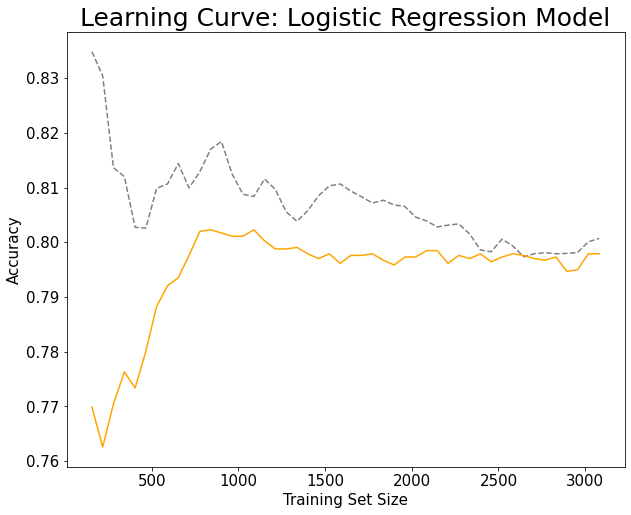

In [149]:
#Learning Curve

sizes, score_tr, score_tst = learning_curve(lr, X, np.ravel(y), cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
mean_tr = np.mean(score_tr, axis=1)
mean_tst = np.mean(score_tst, axis=1)

plt.figure(figsize=[10,8])
plt.plot(sizes, mean_tr, '--', color="gray", label="Train Score")
plt.plot(sizes, mean_tst, color="orange", label="Test Score")
plt.title("Learning Curve: Logistic Regression Model", size=25)
plt.xlabel("Training Set Size", size=15)
plt.ylabel("Accuracy", size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend
plt.show()

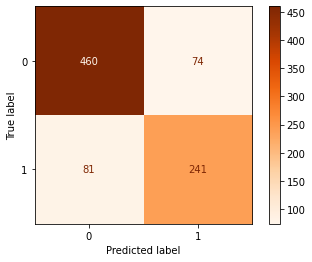

In [159]:
#Plot Confusion Matrix

lr.fit(X_train_sm,y_train_sm)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Oranges')

plt.show()

# **Save the Lotistic Regression Model Using Pickle**

In [160]:
from flask import Flask
import pickle
import json

In [161]:
with open('model.pkl', 'wb') as files:
    pickle.dump(lr, files)

In [162]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0, 0, 1, 0, 5, 0, 0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
